# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\frac{\partial}{\partial w} \text{MSE}(w) = \frac{2}{l} X^T (Xw - y)$$

**$$w = (X^T X)^{-1} X^T y$$**

In [1]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict, List
from typing import Type

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import annotations

sns.set(style='darkgrid')

In [2]:
@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p

In [3]:
class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [4]:
class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        # TODO: implement loss calculation function
        if self.loss_function is LossFunction.MSE:
          return (y - x @ self.w).T @ (y - x @ self.w) / len(y)

        elif self.loss_function is LossFunction.LogCosh:
          return (np.log(np.cosh(x @ self.w - y)).T @ np.ones(len(y))) / len(y)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        # TODO: implement prediction function
        return x @ self.w

In [5]:
X = np.array([[1, 2], [3, 4], [5, 6]])  # Матрица признаков
y = np.array([1, 2, 3])  # Вектор истинных значений
tmp = BaseDescent(2)
print(tmp.calc_loss(X, y))
print(tmp.predict(X))

0.06286390784625194
[0.72489215 2.02979286 3.33469356]


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [6]:
class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        weight_diff = - self.lr() * gradient
        self.w += weight_diff
        return weight_diff

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        if self.loss_function is LossFunction.MSE:
          return 2/len(y) * x.T @ (x @ self.w - y)

        elif self.loss_function is LossFunction.LogCosh:
          return x.T @ np.tanh(x @ self.w - y) / len(y)

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [7]:
class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        # TODO: implement calculating gradient function
        indices = np.random.randint(0, len(y), self.batch_size)
        x_batch, y_batch = x[indices], y[indices]
        if self.loss_function is LossFunction.MSE:
          return 2 * x_batch.T @ (x_batch @ self.w - y_batch) / len(y_batch)
        elif self.loss_function is LossFunction.LogCosh:
           return x_batch.T @ np.tanh(x_batch @ self.w - y_batch) / len(y_batch)

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [8]:
class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        self.h = self.alpha * self.h + self.lr() * gradient
        self.w -= self.h
        return - self.h

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [9]:
class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        # TODO: implement updating weights function
        self.iteration += 1
        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * gradient ** 2
        m_hat = self.m / (1 - self.beta_1 ** self.iteration)
        v_hat = self.v / (1 - self.beta_2 ** self.iteration)
        weight_diff = - self.lr() / (np.sqrt(v_hat) + self.eps) * m_hat
        self.w += weight_diff
        return weight_diff

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [10]:
def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))

In [11]:
class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        # TODO: fit weights to x and y
        self.loss_history.append(self.descent.calc_loss(x, y))

        for i in range(self.max_iter):
          weight_diff = self.descent.step(x, y)
          self.loss_history.append(self.descent.calc_loss(x, y))
          if np.isnan(weight_diff).any():
            print(f"Stopped early due to NaN in weight difference at iteration {i+1}")
            break
          if np.linalg.norm(weight_diff) ** 2 < self.tolerance:
            print(f"Converged after {i+1} iterations with tolerance {self.tolerance}")
            break

        return self

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)

## Задание 3. Проверка кода (0 баллов)

In [12]:
%load_ext autoreload

In [13]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [14]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [15]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [19]:
data = pd.read_csv('autos.csv')

In [20]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [21]:
categorical = data.select_dtypes(include=['object']).columns.to_list()
numeric = data.select_dtypes(include=['number']).columns.to_list()
other = data.select_dtypes(exclude=['object', 'number']).columns.to_list()
categorical, numeric, other

(['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage'],
 ['powerPS', 'kilometer', 'autoAgeMonths', 'price'],
 [])

<Axes: xlabel='price', ylabel='Count'>

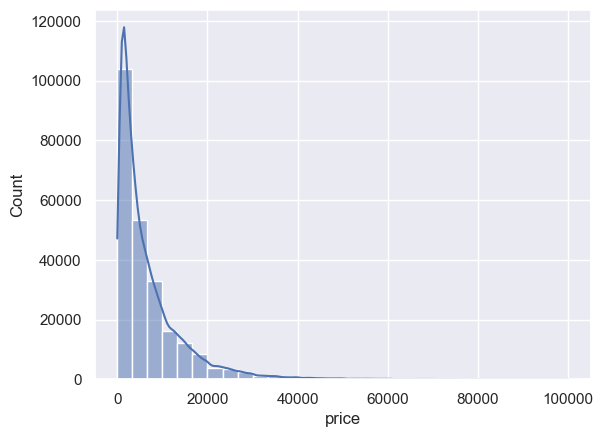

In [22]:
sns.histplot(x=data['price'], bins=30, kde=True)

<Axes: xlabel='price', ylabel='Count'>

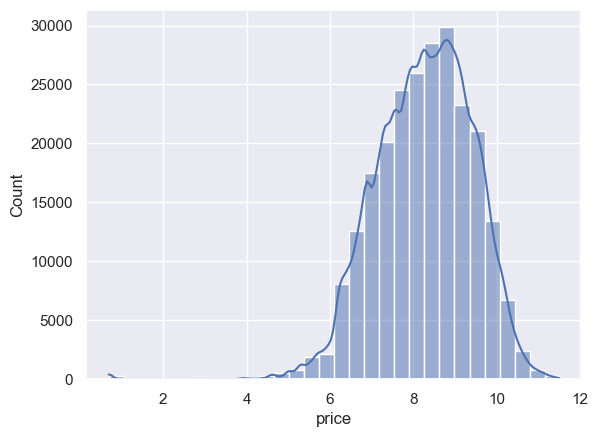

In [23]:
sns.histplot(x=np.log(data['price'] + 1), bins=30, kde=True)

In [24]:
data['price'] = np.log(data['price'] + 1)

<Axes: ylabel='price'>

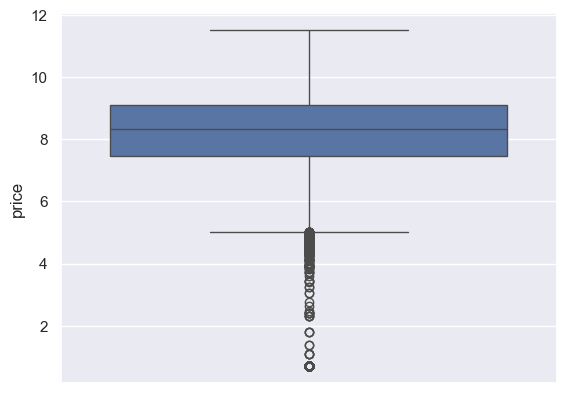

In [25]:
sns.boxplot(y=data['price'])

In [26]:
for col in numeric:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  data = data[(data[col] >= q1-1.5*IQR) & (data[col] <= q3+1.5*IQR)]

<Axes: ylabel='price'>

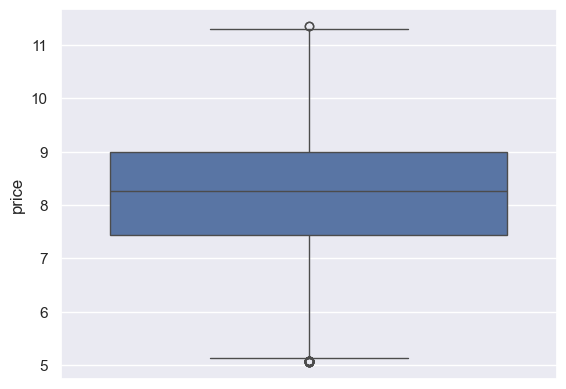

In [27]:
sns.boxplot(y=data['price'])

In [28]:
def percentage_of_nan(df):
    is_nan = df.isna().sum()
    is_nan.sort_values(inplace=True)
    is_nan = is_nan.map(lambda x : x / len(df) * 100)

    print(is_nan)

    plt.figure(figsize=(10,4))
    sns.barplot(x=is_nan.index, y=is_nan.values)
    plt.xticks(rotation=90);

brand                0.0
model                0.0
vehicleType          0.0
gearbox              0.0
fuelType             0.0
notRepairedDamage    0.0
powerPS              0.0
kilometer            0.0
autoAgeMonths        0.0
price                0.0
dtype: float64


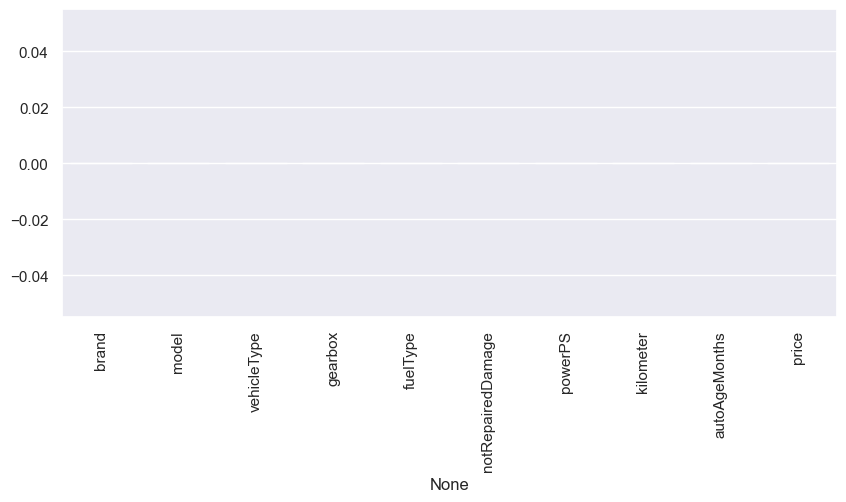

In [29]:
percentage_of_nan(data)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222660 entries, 0 to 241188
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              222660 non-null  object 
 1   model              222660 non-null  object 
 2   vehicleType        222660 non-null  object 
 3   gearbox            222660 non-null  object 
 4   fuelType           222660 non-null  object 
 5   notRepairedDamage  222660 non-null  object 
 6   powerPS            222660 non-null  int64  
 7   kilometer          222660 non-null  int64  
 8   autoAgeMonths      222660 non-null  int64  
 9   price              222660 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 18.7+ MB


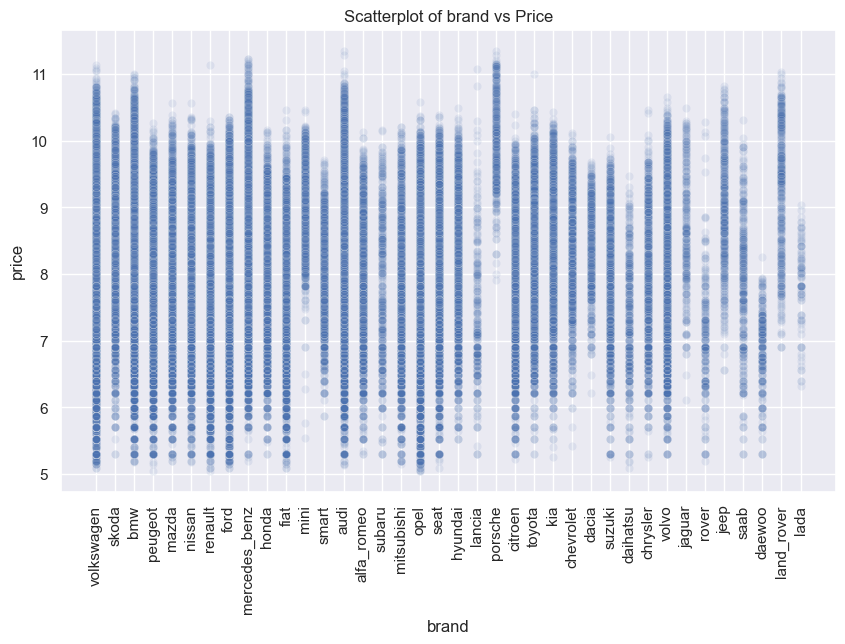

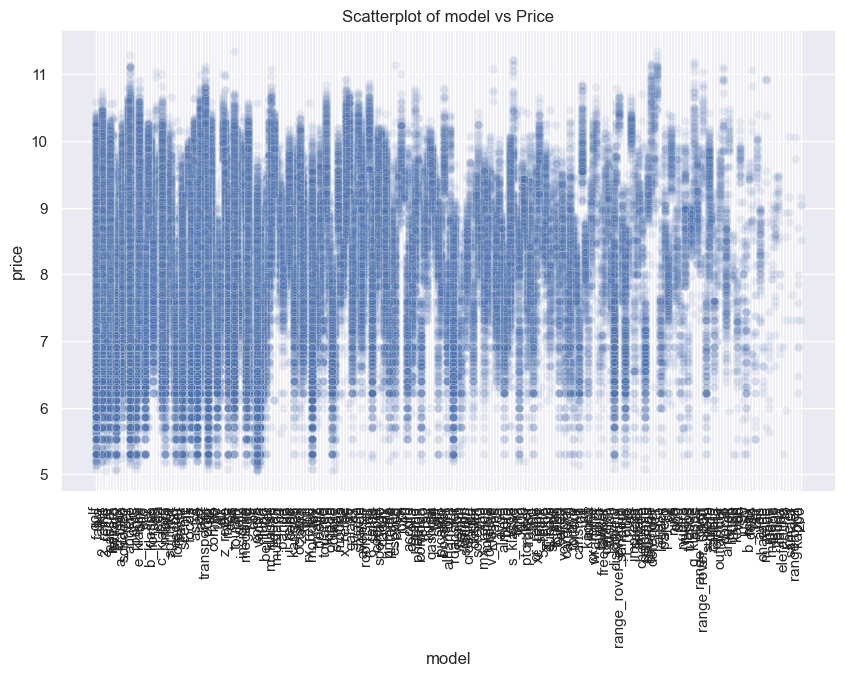

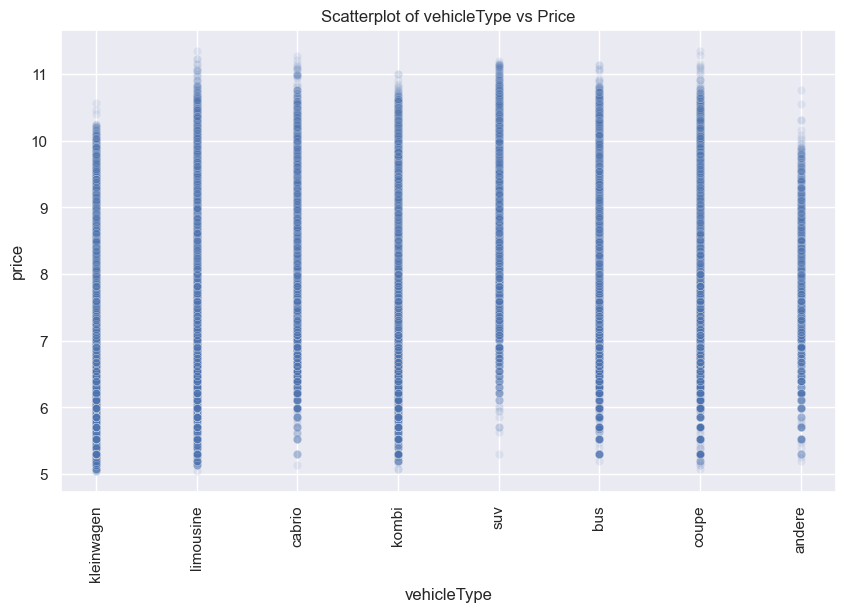

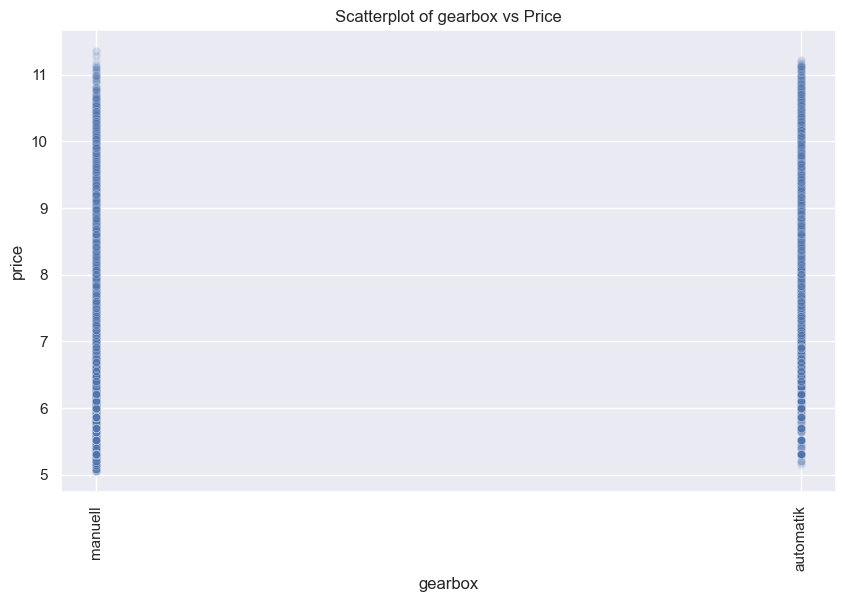

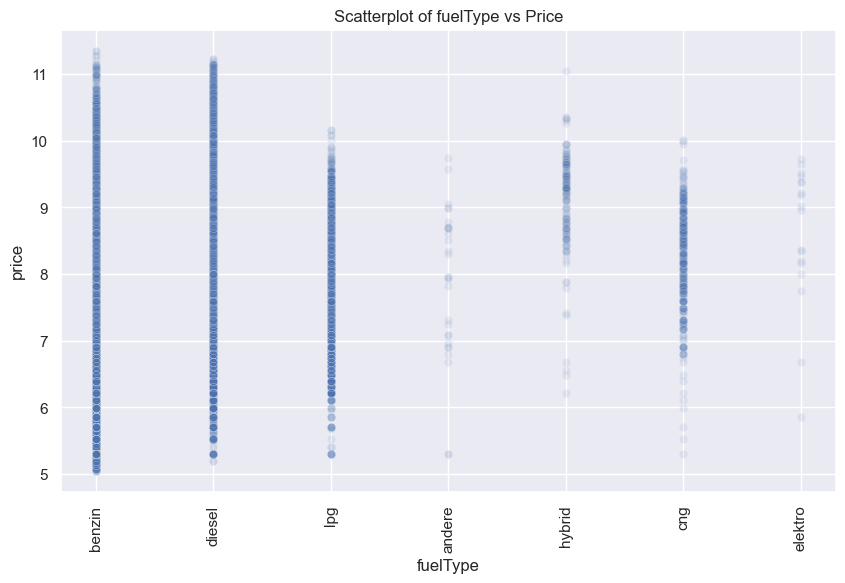

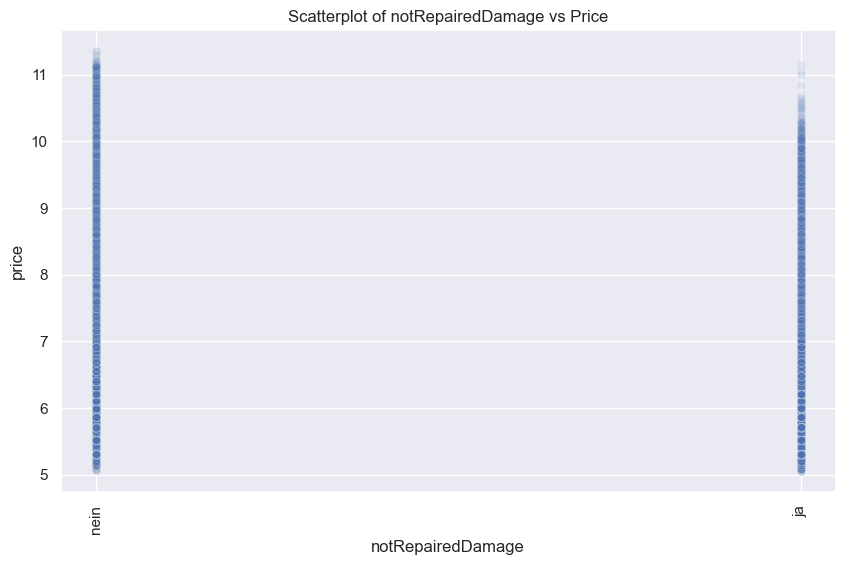

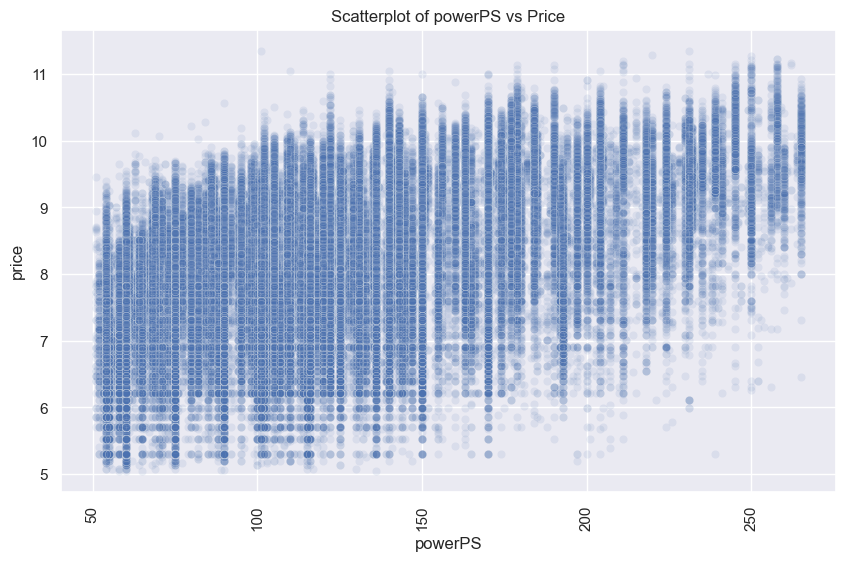

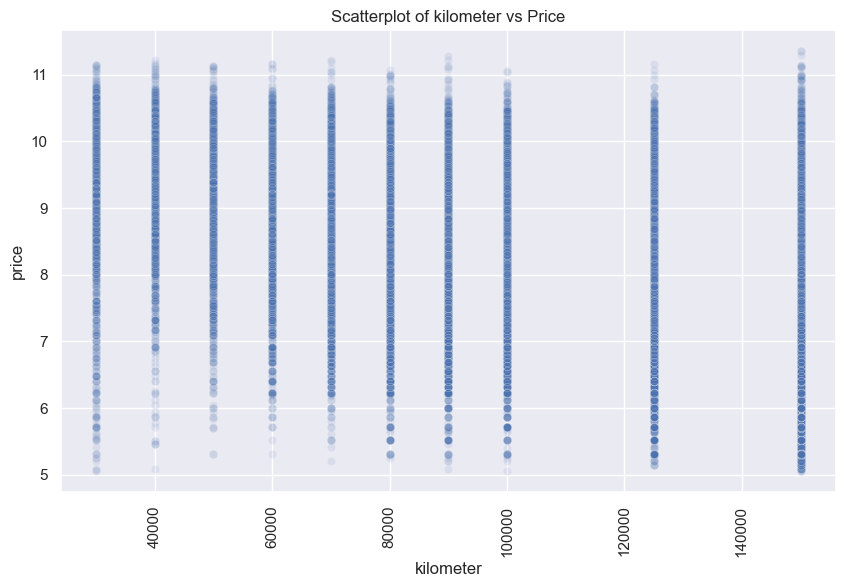

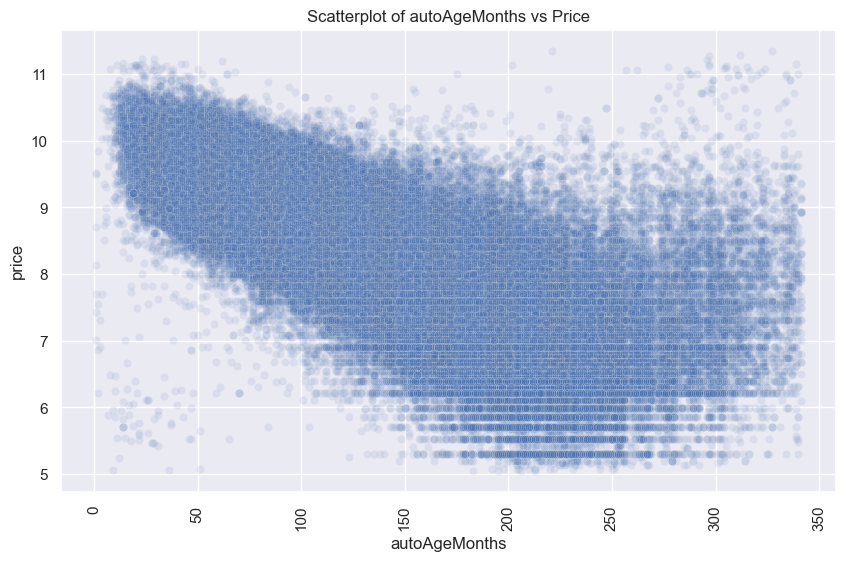

In [31]:
for col in data.columns.to_list():
  if col == 'price': continue
  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=data, x=col, y='price', alpha=0.1)
  plt.xticks(rotation=90);
  plt.title(f'Scatterplot of {col} vs Price')
  plt.show()

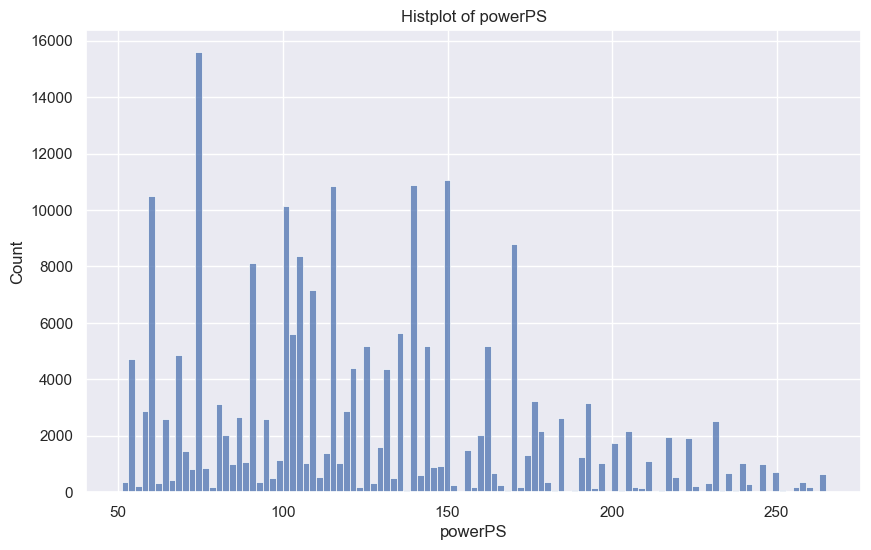

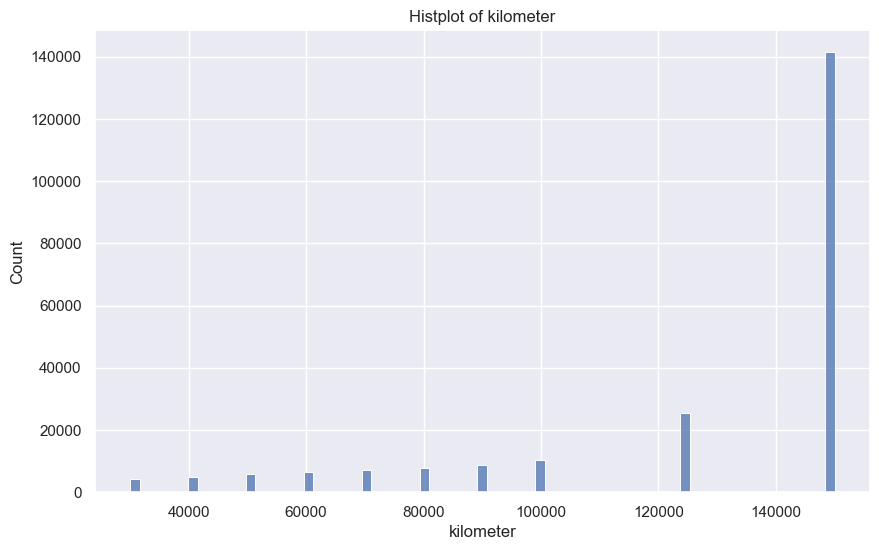

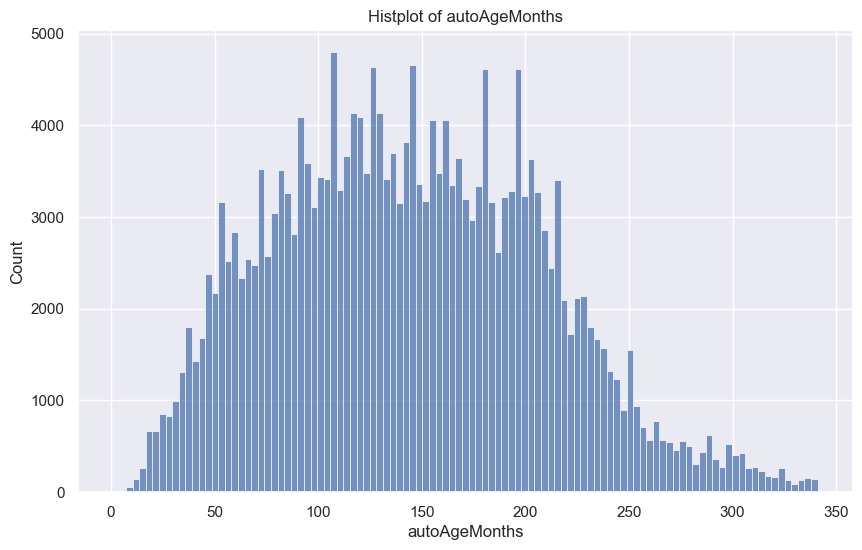

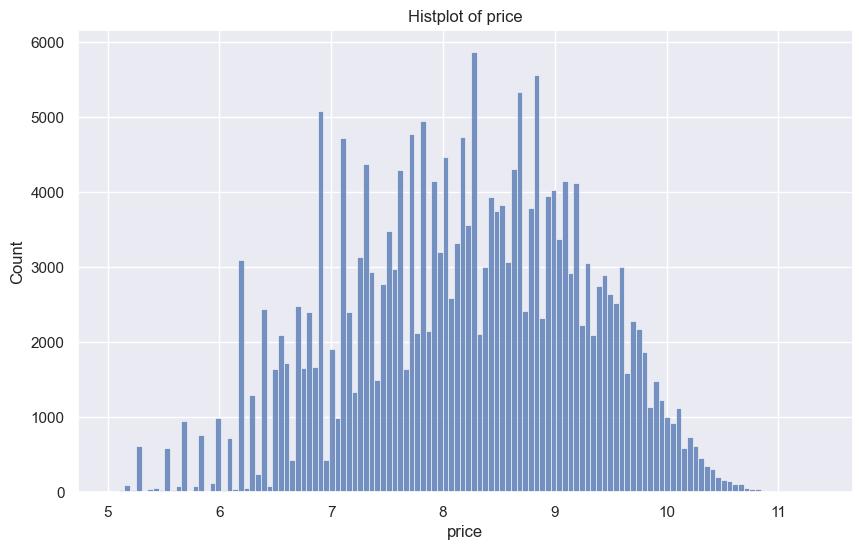

In [32]:
for col in numeric:
  plt.figure(figsize=(10, 6))
  sns.histplot(x=data[col])
  plt.title(f'Histplot of {col}')
  plt.show()

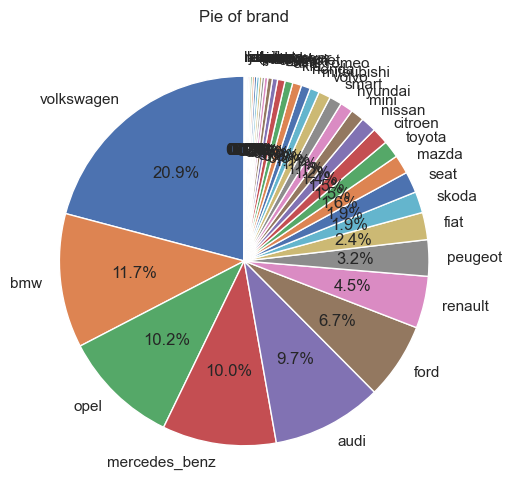

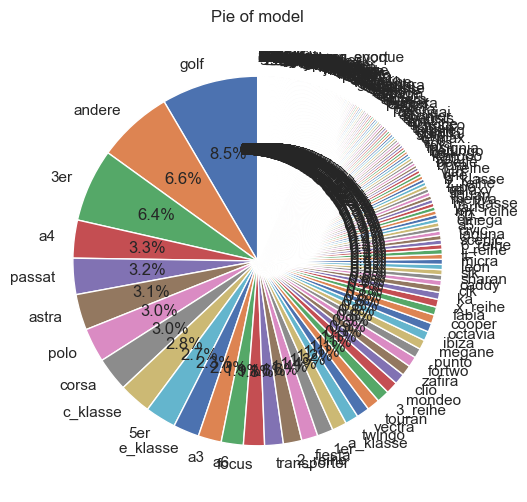

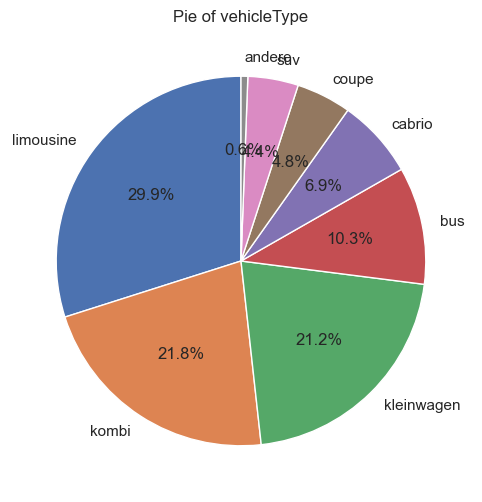

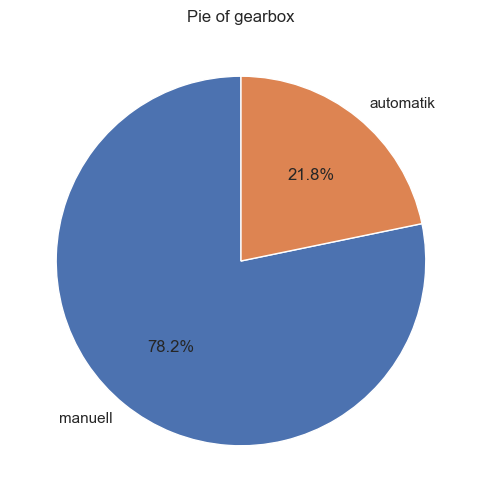

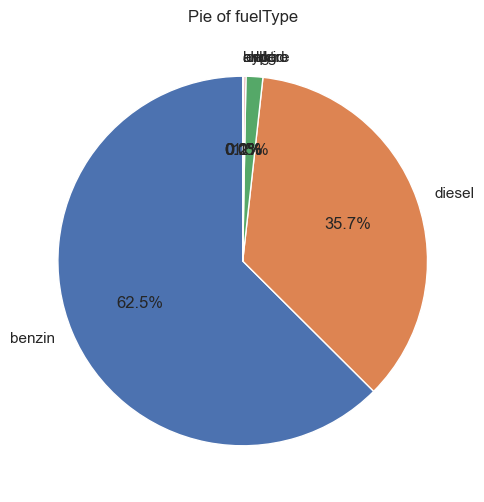

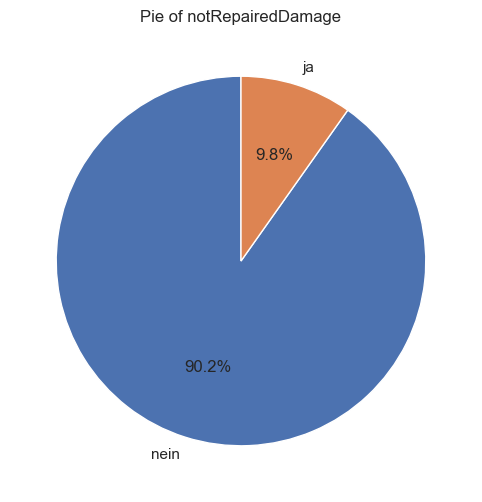

In [33]:
for col in categorical:
  plt.figure(figsize=(10, 6))
  counts = data[col].value_counts()
  plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie of {col}')
  plt.show()

In [34]:
threshold = 0.03
for col in categorical:
  counts = data[col].value_counts(normalize=True)
  rows = counts[counts >= threshold].index
  data[col] = data[col].apply(lambda x: x if x in rows else 'other')

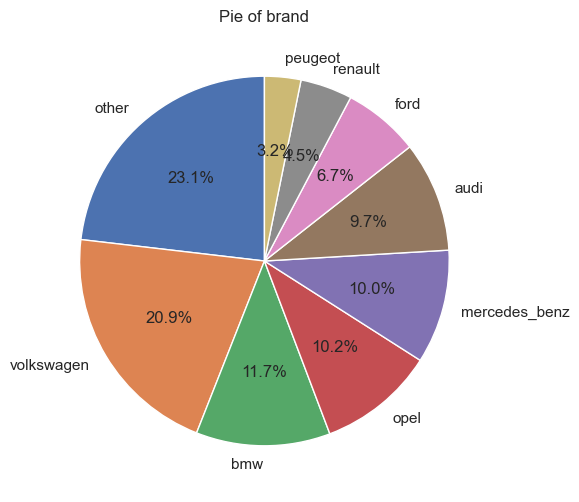

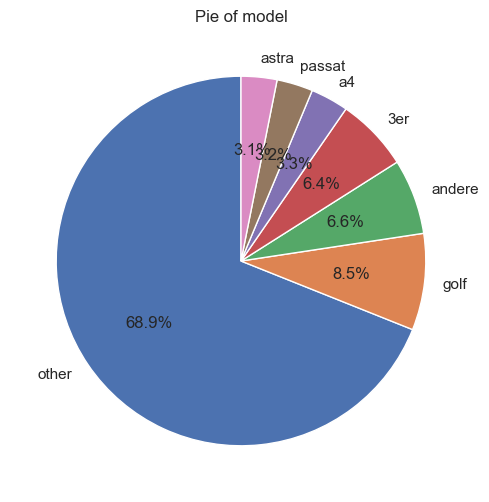

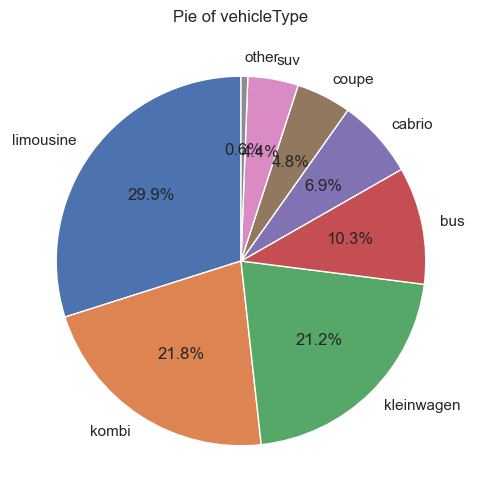

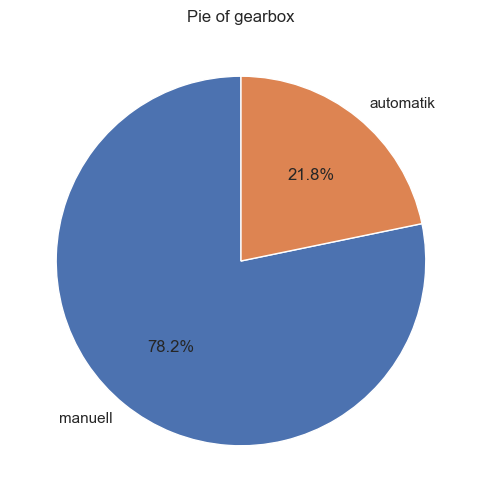

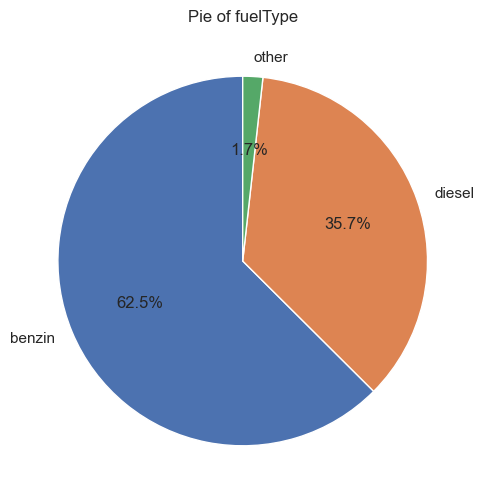

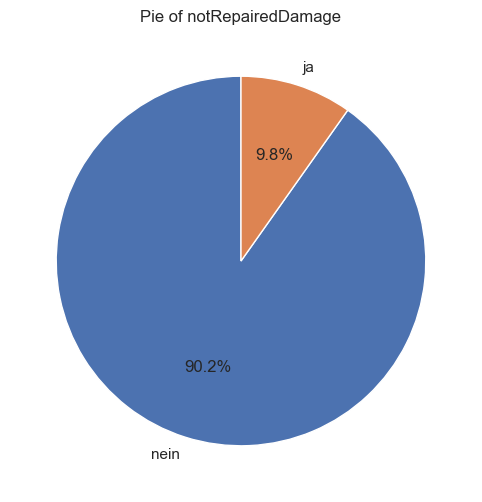

In [35]:
for col in categorical:
  plt.figure(figsize=(10, 6))
  counts = data[col].value_counts()
  plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie of {col}')
  plt.show()

In [36]:
correlation = data[numeric].corr()['price'].drop('price', axis=0)

In [37]:
correlation

powerPS          0.542356
kilometer       -0.444443
autoAgeMonths   -0.741831
Name: price, dtype: float64

In [38]:
for col in categorical:
  tmp = pd.factorize(data[col])[0]
  tmp = pd.Series(data=tmp, name=col)
  correlation[col] = tmp.corr(data['price'])

In [39]:
correlation

powerPS              0.542356
kilometer           -0.444443
autoAgeMonths       -0.741831
brand                0.000711
model               -0.002328
vehicleType         -0.004102
gearbox              0.001617
fuelType             0.000281
notRepairedDamage    0.002981
Name: price, dtype: float64

In [40]:
data.nunique()

brand                   9
model                   7
vehicleType             8
gearbox                 2
fuelType                3
notRepairedDamage       2
powerPS               213
kilometer              10
autoAgeMonths         341
price                4144
dtype: int64

In [41]:
data['bias'] = 1
other = ['bias']

x = data[categorical + numeric + other]
y = data['price'].values

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
lambdas = np.logspace(-5, 0, 10)
methods = ['full', 'stochastic', 'momentum', 'adam']
best_results = {}
for method in methods:
    print(f'Метод - {method}')
    best_val_loss = float('inf')
    best_lambda = None
    best_model = None

    for lam in lambdas:
        descent_config = {
            'descent_name' : method,
            'regularized' : False,
            'kwargs' : {
                'dimension' : X_train.shape[1],
                'lambda_' : lam
            }
        }

        model = LinearRegression(descent_config=descent_config, max_iter=1000)
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Ошибка при lambda={lam}: {e}")
            continue


        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        train_loss = mean_squared_error(y_train, y_train_pred)
        val_loss = mean_squared_error(y_val, y_val_pred)

        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        iterations = len(model.loss_history)
        print(f'lambda = {lam}, MSE(train) = {train_loss}, MSE(val) = {val_loss}, r2_train = {train_r2}, r2_val = {val_r2}, iterations = {iterations}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model
            best_lambda = lam

    best_results[method] = {
        'best_model' : best_model,
        'best_lambda' : best_lambda,
        'val_loss' : best_val_loss,
        'train_r2' : r2_score(y_train, best_model.predict(X_train)),
        'val_r2' : r2_score(y_val, best_model.predict(X_val)),
        'iterations' : len(best_model.loss_history)
    }

best_results

Метод - full
Converged after 1 iterations with tolerance 0.0001
lambda = 1e-05, MSE(train) = 32.37301647047769, MSE(val) = 32.104645415137995, r2_train = -27.925904114604897, r2_val = -27.749749398073835, iterations = 2
Converged after 1 iterations with tolerance 0.0001
lambda = 3.5938136638046256e-05, MSE(train) = 24.99634587889816, MSE(val) = 24.846175537489135, r2_train = -21.334709055236782, r2_val = -21.249780708263113, iterations = 2
Converged after 1 iterations with tolerance 0.0001
lambda = 0.0001291549665014884, MSE(train) = 26.084988880884623, MSE(val) = 25.8592393912907, r2_train = -22.30743222174223, r2_val = -22.156980633520927, iterations = 2
Converged after 1 iterations with tolerance 0.0001
lambda = 0.0004641588833612782, MSE(train) = 26.0603825437038, MSE(val) = 26.035460761559207, r2_train = -22.285445992854562, r2_val = -22.314787087019894, iterations = 2
Converged after 10 iterations with tolerance 0.0001
lambda = 0.0016681005372000592, MSE(train) = 24.0797784295585

{'full': {'best_model': <__main__.LinearRegression at 0x23420480490>,
  'best_lambda': np.float64(1.0),
  'val_loss': 0.009567829189654316,
  'train_r2': 0.9914267923378703,
  'val_r2': 0.9914319972100849,
  'iterations': 39},
 'stochastic': {'best_model': <__main__.LinearRegression at 0x23422f051d0>,
  'best_lambda': np.float64(0.2782559402207126),
  'val_loss': 0.1145652898705372,
  'train_r2': 0.8961609331176681,
  'val_r2': 0.8974066422193664,
  'iterations': 44},
 'momentum': {'best_model': <__main__.LinearRegression at 0x23422eeb0d0>,
  'best_lambda': np.float64(0.2782559402207126),
  'val_loss': 0.011497641712846516,
  'train_r2': 0.9896559184979425,
  'val_r2': 0.9897038477254972,
  'iterations': 88},
 'adam': {'best_model': <__main__.LinearRegression at 0x23423b7d4d0>,
  'best_lambda': np.float64(0.2782559402207126),
  'val_loss': 0.006829687270964404,
  'train_r2': 0.9939017931306383,
  'val_r2': 0.9938840066610779,
  'iterations': 73}}

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [74]:
columns = list(best_results['full'].keys())[2:]
dataf = {}
for col in columns:
    dataf[col] = []
    for method in methods:
        dataf[col].append(best_results[method][col])

dataf = pd.DataFrame(dataf, index=methods)
dataf

val_loss  train_r2    val_r2  iterations
full        0.009568  0.991427  0.991432          39
stochastic  0.114565  0.896161  0.897407          44
momentum    0.011498  0.989656  0.989704          88
adam        0.006830  0.993902  0.993884          73

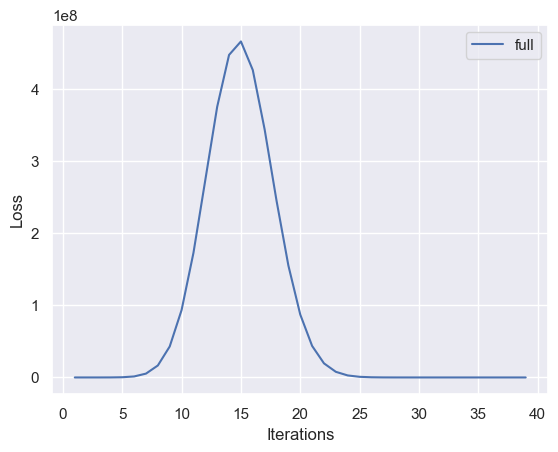

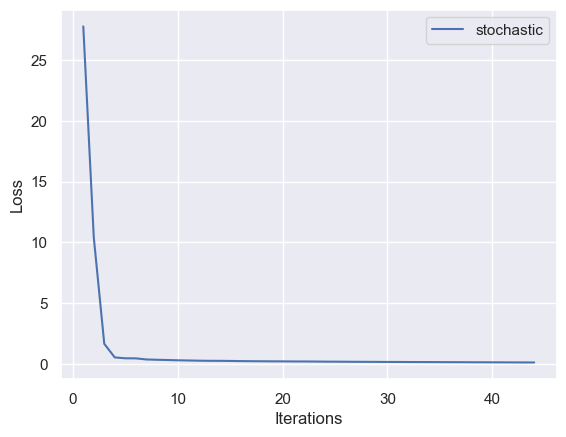

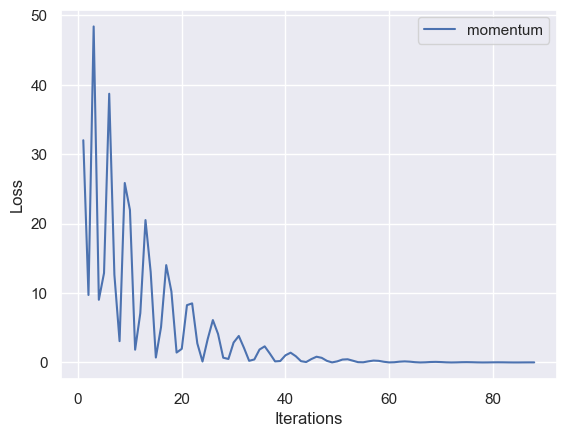

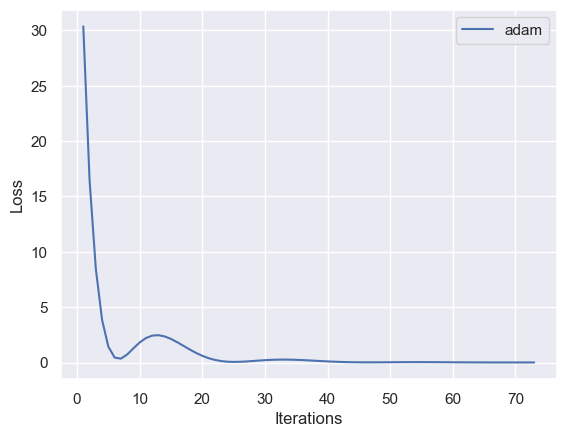

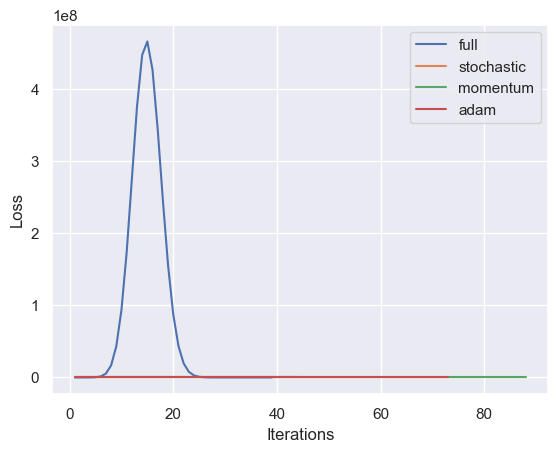

In [81]:
# max_iter = max([best_results[method]['iterations'] for method in methods])
for method in methods:
    loss_history = best_results[method]['best_model'].loss_history
    iterations = best_results[method]['iterations']
    plt.plot(range(1, iterations + 1), loss_history, label=method)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

for method in methods:
    loss_history = best_results[method]['best_model'].loss_history
    iterations = best_results[method]['iterations']
    plt.plot(range(1, iterations + 1), loss_history, label=method)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [101]:
batch_sizes

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [102]:
import time
k = 10
batch_sizes = [2**i for i in range(1, 10 + 1)]
avg_iter = []
avg_time = []
for size in batch_sizes:
    iteration_list = []
    time_list = []
    for i in range(k):
        descent_config = {
            'descent_name' : 'stochastic',
            'regularized' : False,
            'kwargs' : {
                'dimension' : X_train.shape[1],
                'lambda_' : 0.01,
                'batch_size' : size
            }
        }

        model = LinearRegression(descent_config=descent_config)

        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        time_list.append(end_time - start_time)
        iteration_list.append(len(model.loss_history))
    avg_iter.append(np.mean(iteration_list))
    avg_time.append(np.mean(time_list))

Converged after 40 iterations with tolerance 0.0001
Converged after 30 iterations with tolerance 0.0001
Converged after 23 iterations with tolerance 0.0001
Converged after 64 iterations with tolerance 0.0001
Converged after 26 iterations with tolerance 0.0001
Converged after 38 iterations with tolerance 0.0001
Converged after 47 iterations with tolerance 0.0001
Converged after 44 iterations with tolerance 0.0001
Converged after 48 iterations with tolerance 0.0001
Converged after 41 iterations with tolerance 0.0001
Converged after 36 iterations with tolerance 0.0001
Converged after 55 iterations with tolerance 0.0001
Converged after 36 iterations with tolerance 0.0001
Converged after 36 iterations with tolerance 0.0001
Converged after 31 iterations with tolerance 0.0001
Converged after 31 iterations with tolerance 0.0001
Converged after 43 iterations with tolerance 0.0001
Converged after 59 iterations with tolerance 0.0001
Converged after 40 iterations with tolerance 0.0001
Converged af

[]

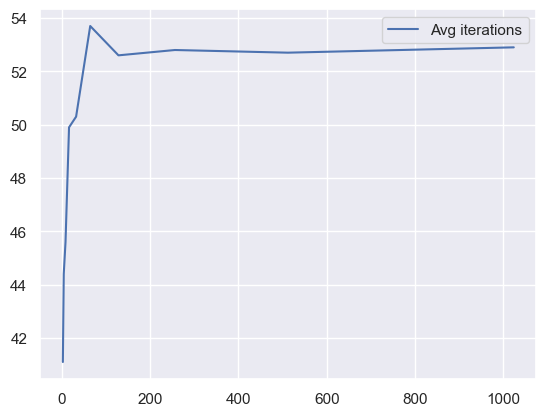

In [103]:
plt.plot(batch_sizes, avg_iter, label='Avg iterations')
plt.legend()
plt.plot()

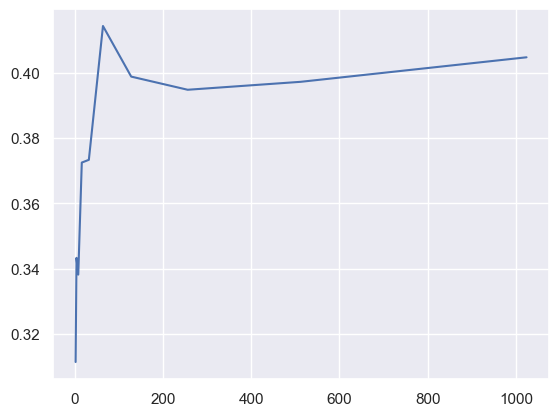

In [104]:
plt.plot(batch_sizes, avg_time, label='Avg time')

In [106]:
import datetime
k = 10
batch_sizes = [2**i for i in range(1, 10 + 1)]
batch_configs = []

for batch_size in batch_sizes:

  descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'batch_size': batch_size
            }
        }

  time_sum, iterations_sum = 0, 0

  for _ in range(k):
    model = LinearRegression(descent_config = descent_config)

    start_time = datetime.datetime.now()
    model.fit(X_train, y_train)
    end_time = datetime.datetime.now()

    time = end_time - start_time
    iterations = len(model.loss_history)

    time_sum += time.total_seconds()
    iterations_sum += iterations

  batch_config = {}
  batch_config['batch_size'] = batch_size
  batch_config['time'] = round(time_sum / k, 5)
  batch_config['iterations'] = iterations_sum / k

  batch_configs.append(batch_config)

Converged after 10 iterations with tolerance 0.0001
Converged after 3 iterations with tolerance 0.0001
Converged after 6 iterations with tolerance 0.0001
Converged after 5 iterations with tolerance 0.0001
Converged after 5 iterations with tolerance 0.0001
Converged after 4 iterations with tolerance 0.0001
Converged after 3 iterations with tolerance 0.0001
Converged after 2 iterations with tolerance 0.0001
Converged after 4 iterations with tolerance 0.0001
Converged after 5 iterations with tolerance 0.0001
Converged after 7 iterations with tolerance 0.0001
Converged after 8 iterations with tolerance 0.0001
Converged after 6 iterations with tolerance 0.0001
Converged after 4 iterations with tolerance 0.0001
Converged after 3 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 5 iterations with tolerance 0.0001
Converged after 2 iterations with tolerance 0.0001
Converged after 3 iterations with tolerance 0.0001
Converged after 4 iterations w

In [108]:
batch_df = pd.DataFrame(batch_configs).set_index('batch_size')
batch_df

time  iterations
batch_size                     
2           0.04566         5.7
4           0.04471         5.3
8           0.03981         4.7
16          0.03871         4.2
32          0.03361         4.1
64          0.04061         4.0
128         0.04031         4.1
256         0.03501         3.9
512         0.04222         4.4
1024        0.04431         4.9

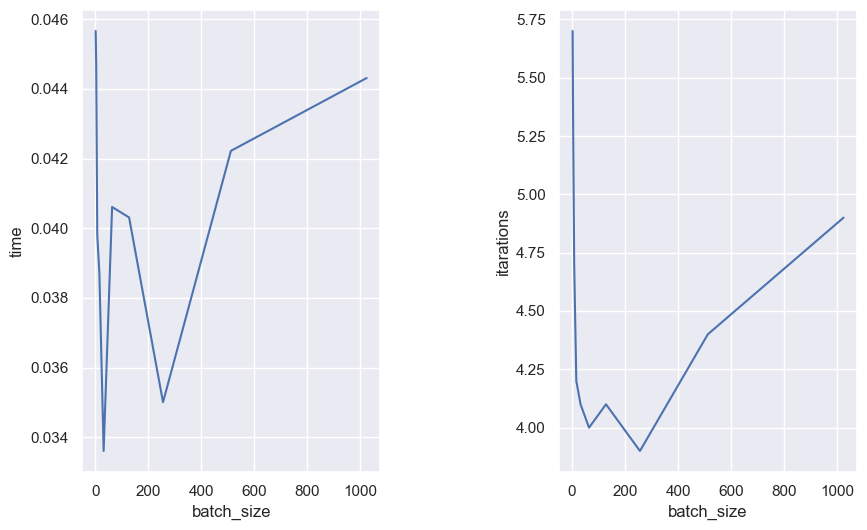

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].plot(batch_df.index.to_list(), batch_df['time'])
axes[0].set_ylabel('time')
axes[0].set_xlabel('batch_size')

axes[1].plot(batch_df.index.to_list(), batch_df['iterations'])
axes[1].set_ylabel('itarations')
axes[1].set_xlabel('batch_size')

plt.subplots_adjust(wspace=0.6)
# plt.tight_layout()
plt.show()

**Основные выводы:**

**1)** Меньшие батчи (2, 4) требуют больше времени на тренировку, что связано с более частыми обновлениями весов, несмотря на то, что число итераций не сильно отличается.

**2)** Оптимальные батчи для времени тренировки находятся в диапазоне 128–256. Эти размеры батча обеспечивают хороший баланс между количеством итераций и временем тренировки.

**3)** Большие батчи (512 и 1024) показывают минимальное время тренировки, но могут снизить точность модели из-за более грубых обновлений параметров.

В зависимости от задачи, можно выбрать оптимальный размер батча. Например, для быстрой тренировки и использования вычислительных ресурсов стоит выбирать более крупные батчи, но важно помнить, что слишком большие батчи могут влиять на точность из-за нечастых обновлений.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

In [ ]:
class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient: np.ndarray = np.zeros_like(self.w)  # TODO: replace with L2 gradient calculation
        l2_gradient[:-1] = self.mu * self.w[:-1]

        return super().calc_gradient(x, y) + l2_gradient

class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """


Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
def search_best_lambda_mu(descent_name, lambdas, mus):
    best_model_config = {
        'descent_name': descent_name,
        'regularized': True,
        'lambda_': None,
        'mu': None,
        'scores': {
            'train': {'train_loss': None, 'train_r2': None, 'history': None, 'iterations': None},
            'val': {'val_loss': float('inf'), 'val_r2': None},
            'test': {'test_loss': None, 'test_r2': None},
        }
    }

    for lambda_ in lambdas:
        for mu in mus:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_': lambda_,
                    'mu': mu
                }
            }

            model = LinearRegression(descent_config=descent_config)
            train_loss, train_r2, val_loss, val_r2, test_loss, test_r2, history = train_evaluate_test(
                model, X_train, y_train, X_val, y_val, X_test, y_test
            )

            if val_loss < best_model_config['scores']['val']['val_loss']:
                best_model_config['lambda_'] = lambda_
                best_model_config['mu'] = mu
                best_model_config['scores']['train']['train_loss'] = train_loss
                best_model_config['scores']['train']['train_r2'] = train_r2
                best_model_config['scores']['train']['iterations'] = len(history)
                best_model_config['scores']['train']['history'] = history
                best_model_config['scores']['val']['val_loss'] = val_loss
                best_model_config['scores']['val']['val_r2'] = val_r2
                best_model_config['scores']['test']['test_loss'] = test_loss
                best_model_config['scores']['test']['test_r2'] = test_r2

    return best_model_config

descent_names = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, 0, 8)  # от 1e-5 до 1
# mus = np.linspace(0.5, 0.99, 10)  # 10 значений от 0.5 до 0.99
mus = np.logspace(-6, -2, 8)  # От 1e-6 до 1e-2


model_configs_reg = []

for descent_name in descent_names:
    model_config = search_best_lambda_mu(descent_name, lambdas, mus)
    model_configs_reg.append(model_config)

Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations wi

In [ ]:
rows = []

for config in model_configs_reg:
    row = {
        'descent_name': config['descent_name'],
        'lambda': config['lambda_'],
        'mu': config['mu'],
        'iterations': config['scores']['train']['iterations'],
        'train_loss': config['scores']['train']['train_loss'],
        'train_r2': config['scores']['train']['train_r2'],
        'val_loss': config['scores']['val']['val_loss'],
        'val_r2': config['scores']['val']['val_r2'],
        'test_loss': config['scores']['test']['test_loss'],
        'test_r2': config['scores']['test']['test_r2'],
    }
    rows.append(row)

# Создаём DataFrame
results_reg = pd.DataFrame(rows).set_index('descent_name')
results_reg

lambda        mu  iterations  train_loss  train_r2  val_loss  \
descent_name                                                                  
full          1.00000  0.000052          39    0.010832  0.990321  0.010922   
stochastic    0.19307  0.002683          49    0.124891  0.888408  0.124688   
momentum      1.00000  0.010000         166    0.000726  0.999351  0.000721   
adam          1.00000  0.000004          74    0.001630  0.998543  0.001658   

                val_r2  test_loss   test_r2  
descent_name                                 
full          0.990219   0.010762  0.990609  
stochastic    0.888342   0.125971  0.890079  
momentum      0.999355   0.000731  0.999362  
adam          0.998516   0.001637  0.998571

In [ ]:
results_mse

lambda  iterations  train_loss  train_r2  val_loss    val_r2  \
descent_name                                                                   
full          1.000000          39    0.021280  0.980986  0.020986  0.981207   
stochastic    0.545559          87    0.054843  0.950996  0.054453  0.951237   
momentum      0.545559          93    0.007847  0.992988  0.007811  0.993005   
adam          1.000000          67    0.008760  0.992173  0.008740  0.992174   

              test_loss   test_r2  
descent_name                       
full           0.021171  0.981527  
stochastic     0.055757  0.951347  
momentum       0.007814  0.993181  
adam           0.008745  0.992369

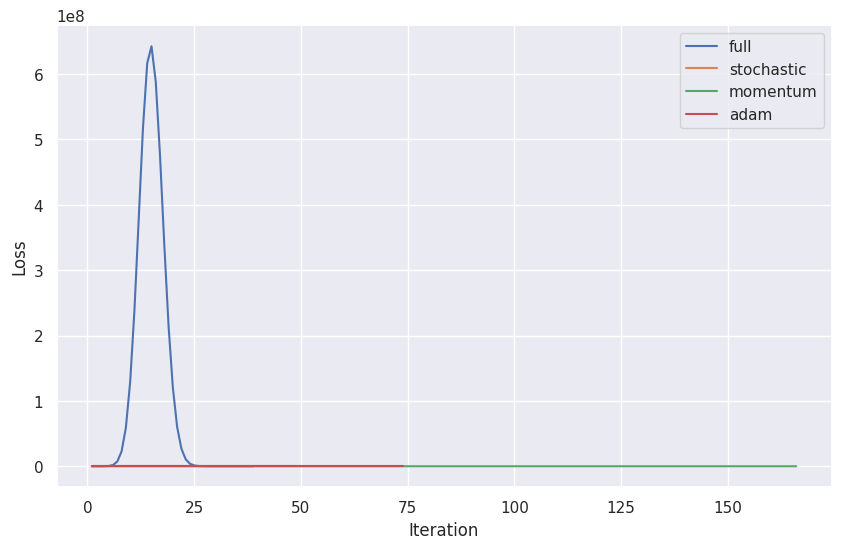

In [ ]:
plot_descent_losses(model_configs_reg)

При подборе коэффициентов с регуляризацией ($\mu$), методы полного градиента (full) и импульса (momentum) показали наилучшие результаты: высокое значение $R^2$ (около 0.999) и минимальные потери на тесте. Метод Adam также продемонстрировал высокую точность ($R^2$ около 0.998), хотя потребовалось больше итераций. Стохастический градиент (stochastic) с регуляризацией показал худшие результаты с $R^2$ около 0.890 и заметно большими потерями.

Без регуляризации методы полного градиента, импульса и Adam показали ещё более высокие метрики — немного улучшилось $R^2$, и уменьшились потери на тестовых данных. Однако стохастический градиент, несмотря на увеличение числа итераций, всё ещё существенно уступает остальным методам по качеству.

В целом, регуляризация оказала положительное влияние только на стохастический градиент, тогда как для остальных методов обучение без неё дало лучшие результаты.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
\nabla_w J = X^T \tanh(Xw - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, 0, 20)  # от 1e-5 до 1
model_configs_log_cosh = []

for descent_name in descent_names:
  model_config = search_best_lambda(descent_name, LossFunction.LogCosh, lambdas)
  model_configs_log_cosh.append(model_config)

Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 1 iterations with tolerance 0.0001
Converged after 2 iterations with tolerance 0.0001
Converged after 7 iterations with tolerance 0.0001
Converged after 23 iterations with tolerance 0.0001
Converged after 65 iterations with tolerance 0.0001
Converged after 81 iterations with tolerance 0.0001
Converged after 40 iterations with tolerance 0.0001
Converged after 38 iterations with tolerance 0.0001
Converged after 49 iterations with tolerance 0.0001
Converged after 53 iterat

In [ ]:
results_log_cosh = dict_to_df(model_configs_log_cosh)

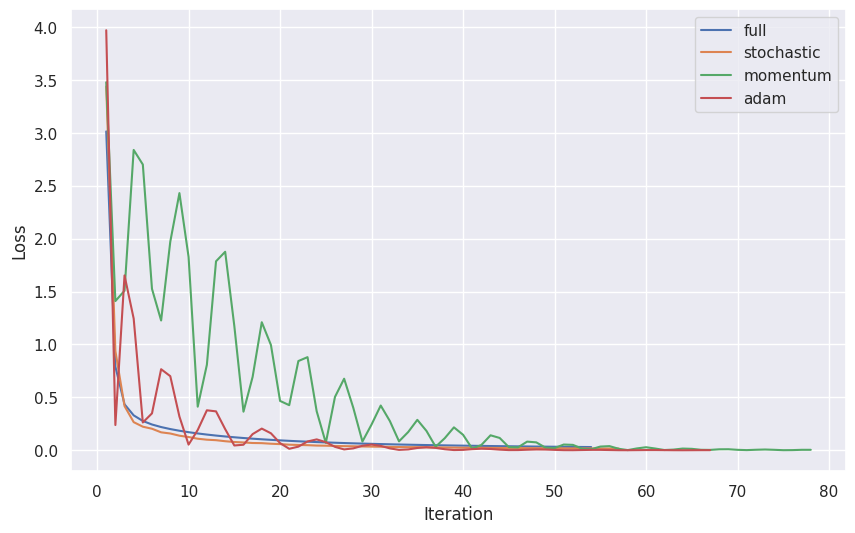

In [ ]:
plot_descent_losses(model_configs_log_cosh)

In [ ]:
results_mse

lambda  iterations  train_loss  train_r2  val_loss    val_r2  \
descent_name                                                                   
full          1.000000          39    0.021280  0.980986  0.020986  0.981207   
stochastic    0.545559          87    0.054843  0.950996  0.054453  0.951237   
momentum      0.545559          93    0.007847  0.992988  0.007811  0.993005   
adam          1.000000          67    0.008760  0.992173  0.008740  0.992174   

              test_loss   test_r2  
descent_name                       
full           0.021171  0.981527  
stochastic     0.055757  0.951347  
momentum       0.007814  0.993181  
adam           0.008745  0.992369

In [ ]:
results_log_cosh

lambda  iterations  train_loss  train_r2  val_loss    val_r2  \
descent_name                                                                 
full             1.0          54    0.030430  0.943720  0.030554  0.943399   
stochastic       1.0          57    0.016278  0.970134  0.016196  0.970224   
momentum         1.0          78    0.004337  0.992231  0.004363  0.992168   
adam             1.0          67    0.001055  0.998115  0.001045  0.998127   

              test_loss   test_r2  
descent_name                       
full           0.031223  0.943545  
stochastic     0.016255  0.970892  
momentum       0.004370  0.992355  
adam           0.001048  0.998171

Влияние выбора функции потерь (MSE или Logcosh) на градиентные спуски проявляется по-разному для каждого метода, а также влияет на необходимое количество итераций. Для ванильного градиентного спуска MSE неожиданно показала себя несколько лучше, чем Logcosh, достигнув более высокого качества и сходимости за меньшее количество итераций. Стохастический градиентный спуск, напротив, значительно лучше работал с Logcosh, в то время как с MSE показал крайне плохие результаты, не сумев эффективно обучиться и при этом потребовав наибольшее число итераций. Momentum и Adam продемонстрировали хорошее качество с обеими функциями потерь, однако Momentum потребовал заметно больше итераций при использовании MSE для достижения сравнимого результата, а Adam показал стабильно отличные результаты независимо от выбора функции и количества итераций. В целом, Logcosh кажется более стабильным выбором, особенно для стохастического градиентного спуска, обеспечивая приемлемое качество для всех методов. MSE, в свою очередь, может быть более чувствительна к выбору оптимизатора, демонстрируя отличные результаты с ванильным спуском и Adam, но проваливаясь со стохастическим градиентным спуском в данном примере, часто требуя при этом большего или меньшего числа итераций в зависимости от метода. Таким образом, выбор между MSE и Logcosh может зависеть не только от желаемого качества, но и от эффективности обучения с точки зрения количества итераций, а также от используемого алгоритма оптимизации, при этом Logcosh может быть предпочтительнее для стохастических методов из-за большей стабильности и иногда меньшего числа необходимых итераций.